In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customer_df = pd.read_csv('customers.csv')
product_df = pd.read_csv('Products.csv')
transaction_df = pd.read_csv('Transactions.csv')

In [3]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
product_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
merged_data = transaction_df.merge(customer_df, on='CustomerID', how='left')
merged_data = merged_data.merge(product_df, on='ProductID', how='left')

In [7]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [8]:
merged_data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [9]:
merged_data.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
CustomerName        object
Region              object
SignupDate          object
ProductName         object
Category            object
Price_y            float64
dtype: object

In [10]:
merged_data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


#### Here We have two same column Price_x and Price_y so we will drop one

In [11]:
merged_data = merged_data.drop('Price_x', axis=1)
merged_data = merged_data.rename(columns={'Price_y': 'Price'})

In [12]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## Distribution of customers by region

In [13]:
region_distribution = customer_df['Region'].value_counts()
region_distribution

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

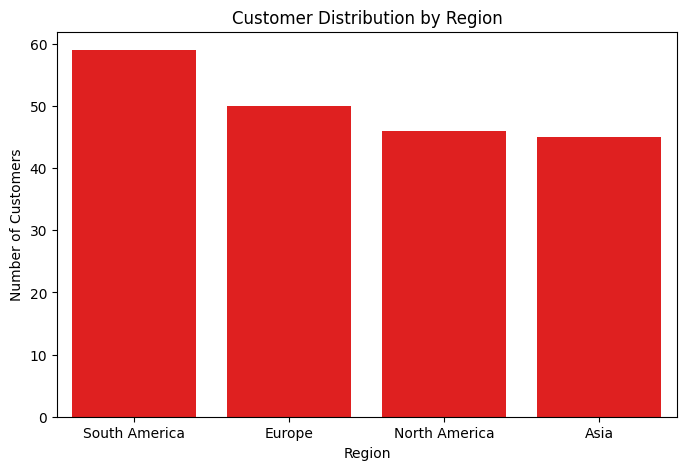

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values,color=('r'))
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()

## Top categories by total revenue

In [15]:
top_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_categories

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64

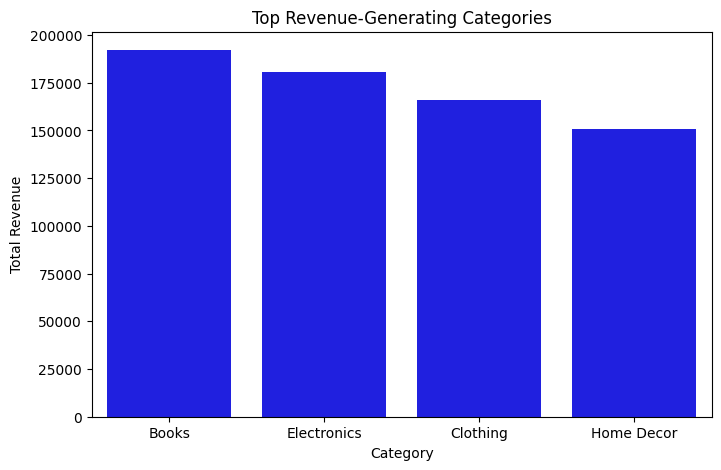

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_categories.index, y=top_categories.values,color=('b'))
plt.title('Top Revenue-Generating Categories')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.show()

## Top customers by spending

In [17]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

C:\Users\badal\AppData\Local\Temp\ipykernel_36916\2254400563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values,palette="mako")


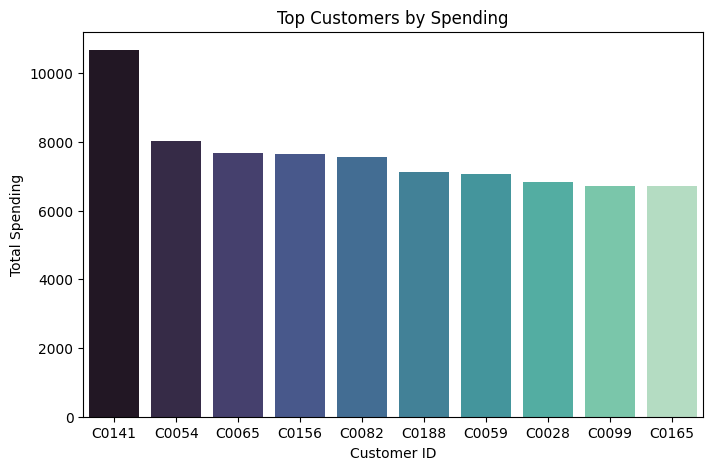

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values,palette="mako")
plt.title('Top Customers by Spending')
plt.ylabel('Total Spending')
plt.xlabel('Customer ID')
plt.show()

## Revenue trends over time

In [19]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
revenue_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
revenue_trends

TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

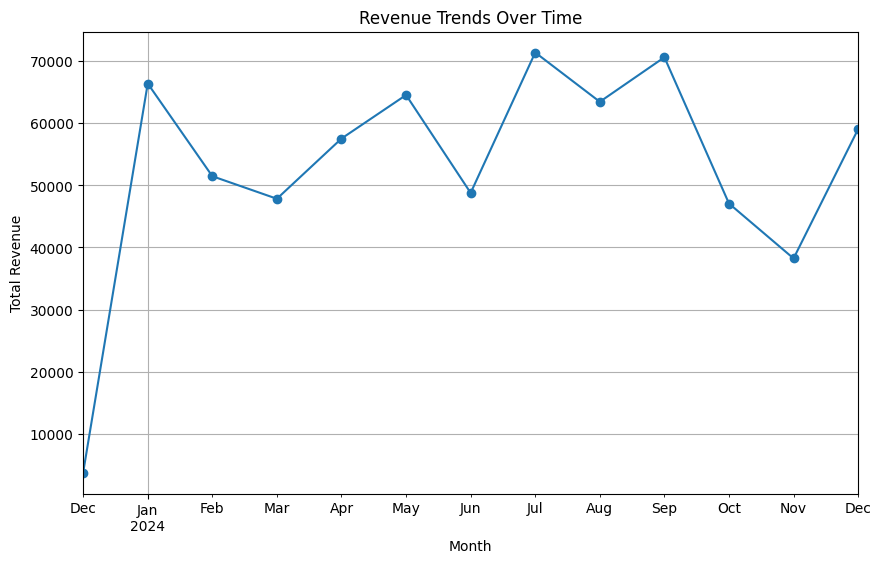

In [20]:
plt.figure(figsize=(10, 6))
revenue_trends.plot(kind='line', marker='o')
plt.title('Revenue Trends Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid()
plt.show()

## Pricing vs Revenue analysis

In [21]:
price_revenue = merged_data.groupby('Price')['TotalValue'].sum()
price_revenue

Price
16.08       337.68
18.82       244.66
26.26       367.64
26.99       647.76
30.59       795.34
            ...   
459.86     6897.90
469.77    12214.02
481.78     8672.04
488.63    11238.49
497.76    12941.76
Name: TotalValue, Length: 100, dtype: float64

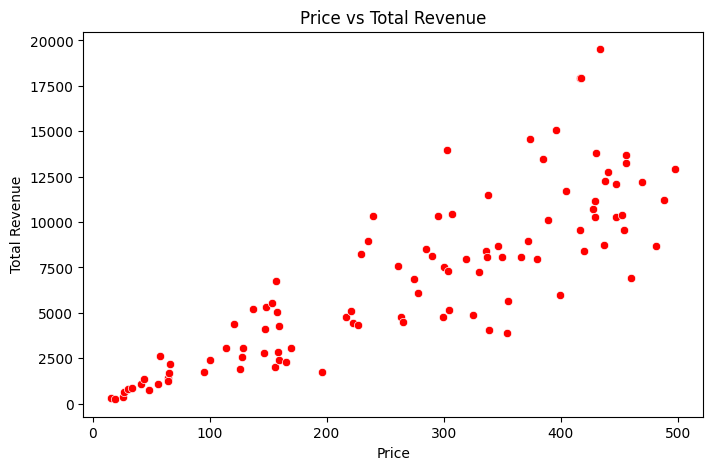

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=price_revenue.index, y=price_revenue.values,color=('r'))
plt.title('Price vs Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Price')
plt.show()

## Customer Signup Trends Over Time

In [23]:
customer_df['SignupDate'] = pd.to_datetime(customer_df['SignupDate'])
signup_trends = customer_df['SignupDate'].dt.month.value_counts().sort_index()
signup_trends

SignupDate
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: count, dtype: int64

C:\Users\badal\AppData\Local\Temp\ipykernel_36916\1703806164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_trends.index, y=signup_trends.values, palette="viridis")


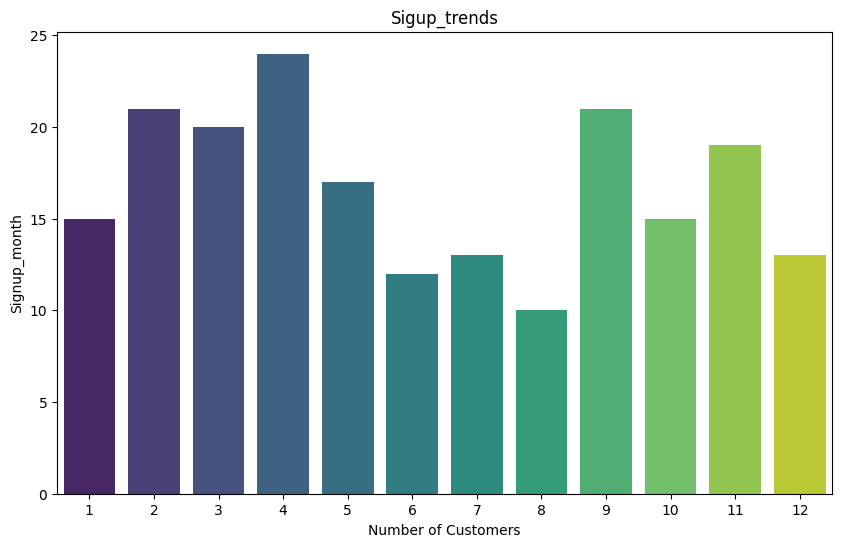

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=signup_trends.index, y=signup_trends.values, palette="viridis")
plt.title("Sigup_trends")
plt.ylabel("Signup_month")
plt.xlabel("Number of Customers")
plt.show()